### Load Vectors

Pico vectors...

In [43]:
pico_elements = ['populations', 'interventions', 'outcomes']

nb_val = 3770
H = np.empty(shape=[nb_val, 0])
for pico_element in pico_elements:
    H_pico = pickle.load(open('../../visualization/cohen_vectors/{}.p'.format(pico_element)))
    H = np.concatenate([H, H_pico], axis=1)

Doc2vec vectors...

In [33]:
H = pickle.load(open('../../visualization/cohen_vectors/doc2vec.p'))

### Exclude Studies Not In a Review

In [44]:
from batch_generators import study_target_generator

df = pd.read_csv('../../preprocess/cohen_tokenized.csv')

mask = (df.label == 'pop') | (df.label == 'intervention') | (df.label == 'outcome')
included_idxs = df.drug[~mask].index.tolist()
H = H[included_idxs]

# Sort indexes for prettier plotting
cdnos = df.drug[~mask].reset_index(drop=True)
cdnos = cdnos.sort_values()
H = H[cdnos.index]
cdnos = cdnos.reset_index(drop=True)

nb_val = len(cdnos)

nb_val

2223

### Create Relevance Matrix

In [45]:
cdno2idxs = {name: group.index.tolist() for name, group in cdnos.groupby(cdnos)}

R = np.zeros([nb_val, nb_val])
for i, cdno in enumerate(cdnos):
    R[i, cdno2idxs[cdno]] = 1
    
R[np.arange(nb_val), np.arange(nb_val)] = 0 # documents are not relevant to themselves0

R

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.]])

### Create Simliarity Matrix

In [46]:
S = np.dot(H, H.T)
S[np.arange(nb_val), np.arange(nb_val)] = -np.inf # hackily remove each vector's similarity with itself
S *= -1 # sort by ascending

sorted_idxs = S.argsort()

Shift relevance matrix to reflect ordering of highest scores...

In [47]:
P = np.zeros_like(R)

for i, idx_row in enumerate(sorted_idxs):
    P[i] = R[[i]*nb_val, list(idx_row)]

### PICO Precision

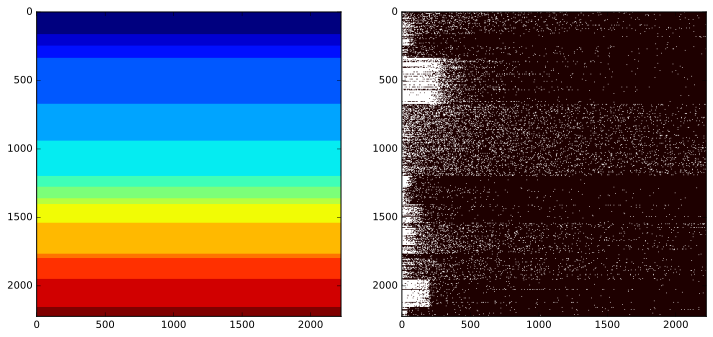

In [48]:
fig, (axes1, axes2) = plt.subplots(1, 2, figsize=[12, 12])

from matplotlib import cm

axes2.imshow(P, interpolation='nearest', cmap=cm.pink)

a = np.zeros_like(P)
a[:] = np.array(cdnos.astype('category').cat.codes)[:, np.newaxis]
axes1.imshow(a)

plt.show()

In [49]:
k = 10

precisions = P[:, :k].sum(axis=1) / k

np.mean(precisions)

0.7340080971659918

### Doc2Vec Precision

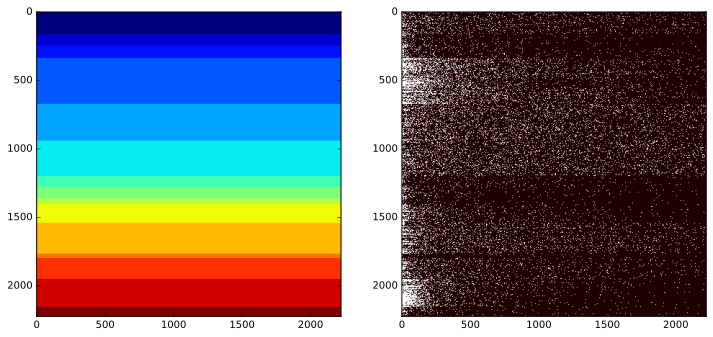

In [41]:
fig, (axes1, axes2) = plt.subplots(1, 2, figsize=[12, 12])

from matplotlib import cm

axes2.imshow(P, interpolation='nearest', cmap=cm.pink)

a = np.zeros_like(P)
a[:] = np.array(cdnos.astype('category').cat.codes)[:, np.newaxis]
axes1.imshow(a)

plt.show()

In [42]:
k = 10

precisions = P[:, :k].sum(axis=1) / k

np.mean(precisions)

0.57174988753936118